<a href="https://colab.research.google.com/github/dudajustyna020/BazaFilmow/blob/main/BazaFilmow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10 najwyżej ocenianych filmów

In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()


df = pd.read_csv('tmdb_movies (4).csv')

if 'vote_count' in df.columns and 'vote_average' in df.columns:

    df_cleaned = df.dropna(subset=['vote_count', 'vote_average']) #usuniecie pustych danych
    Q3 = np.percentile(df_cleaned['vote_count'], 75) #obliczenie Q3
    filtered_df = df_cleaned[df_cleaned['vote_count'] > Q3] #filmy z większąliczbą głosów od Q3
    top_10_movies = filtered_df.sort_values(by='vote_average', ascending=False).head(10)

print("10 najwyżej ocenianych filmów, których liczba głosów jest większa od 3. kwartyla:")
print(top_10_movies[['title', 'vote_average', 'vote_count']])




Saving tmdb_movies (4).csv to tmdb_movies (4).csv
10 najwyżej ocenianych filmów, których liczba głosów jest większa od 3. kwartyla:
                                title  vote_average  vote_count
1881         The Shawshank Redemption           8.5        8205
3337                    The Godfather           8.4        5893
2731           The Godfather: Part II           8.3        3338
3232                     Pulp Fiction           8.3        8428
3865                         Whiplash           8.3        4254
1818                 Schindler's List           8.3        4329
662                        Fight Club           8.3        9413
2294                    Spirited Away           8.3        3840
2170                           Psycho           8.2        2320
3719  One Flew Over the Cuckoo's Nest           8.2        2919


Wykres średni przychód i budżet filmu w latach 2010-2016


In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df_filtered = df[(df['release_date'].dt.year >= 2010) & (df['release_date'].dt.year <= 2016)]
df_filtered = df_filtered.dropna(subset=['revenue', 'budget'])
grouped_df = df_filtered.groupby(df_filtered['release_date'].dt.year)[['revenue', 'budget']].mean()
print(grouped_df)

                   revenue        budget
release_date                            
2010          9.043811e+07  3.449541e+07
2011          9.200413e+07  3.477232e+07
2012          1.160659e+08  3.492203e+07
2013          1.013485e+08  3.552329e+07
2014          1.013466e+08  3.095989e+07
2015          1.054399e+08  3.113216e+07
2016          1.390496e+08  4.570327e+07


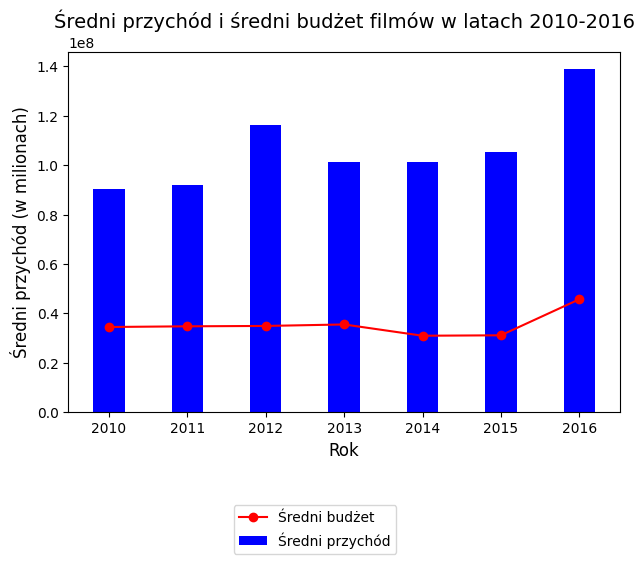

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.bar(grouped_df.index, grouped_df['revenue'], color='b', width=0.4, label='Średni przychód')


ax.plot(grouped_df.index, grouped_df['budget'], color='r', label='Średni budżet', marker='o')

ax.set_xlabel('Rok', fontsize=12)
ax.set_ylabel('Średni przychód (w milionach)', fontsize=12)

plt.title('Średni przychód i średni budżet filmów w latach 2010-2016', fontsize=14)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fontsize=10)

plt.tight_layout()
plt.show()




Łączenie bazy filmów i bazy gatunków

In [ ]:
from google.colab import files
uploaded = files.upload()


df = pd.read_csv('tmdb_movies (4).csv')
genres_df = pd.read_csv('tmdb_genres (1).csv', header=None)
genres_df.columns = ['genre_id', 'genre_name']

merged_df = pd.merge(df, genres_df, on='genre_id', how='left')
print(merged_df.head())


Saving tmdb_genres (1).csv to tmdb_genres (1) (7).csv
Saving tmdb_movies (4).csv to tmdb_movies (4) (2).csv
   Unnamed: 0     budget                                      homepage  \
0           0  237000000                   http://www.avatarmovie.com/   
1           1  300000000  http://disney.go.com/disneypictures/pirates/   
2           2  245000000   http://www.sonypictures.com/movies/spectre/   
3           3  250000000            http://www.thedarkknightrises.com/   
4           4  260000000          http://movies.disney.com/john-carter   

       id original_language                            original_title  \
0   19995                en                                    Avatar   
1     285                en  Pirates of the Caribbean: At World's End   
2  206647                en                                   Spectre   
3   49026                en                     The Dark Knight Rises   
4   49529                en                               John Carter   

        

Gatunek filmu pojawiający się najczęciej oraz ile filmów tego gatunku jest w bazie

In [ ]:
most_common_genre = merged_df['genre_name'].value_counts().idxmax()  # gatunek pojawiający się najczęściej
most_common_genre_count = merged_df['genre_name'].value_counts().max()  # liczba filmów tego gatunku

most_common_genre, most_common_genre_count

('Drama', 1207)

Najdłuższe filmy

In [ ]:
average_runtime_per_genre = merged_df.groupby('genre_name')['runtime'].mean()
most_duration_genre = average_runtime_per_genre.idxmax()
most_duration_runtime = average_runtime_per_genre.max()

most_duration_genre, most_duration_runtime

('History', 133.96)

Histogram

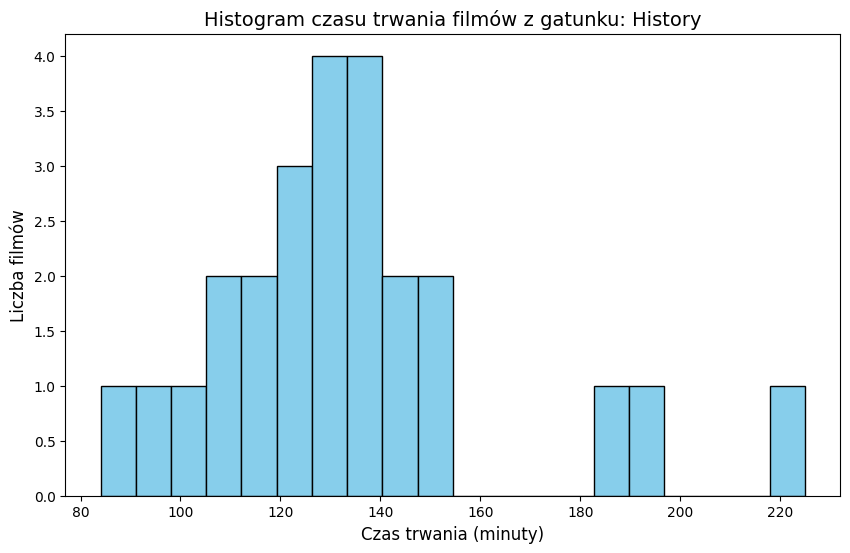

In [ ]:
most_duration_genre_movies = merged_df[merged_df['genre_name'] == most_duration_genre]

#histogram czasu trwania filmów z tego gatunku
plt.figure(figsize=(10, 6))
plt.hist(most_duration_genre_movies['runtime'], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram czasu trwania filmów z gatunku: {most_duration_genre}', fontsize=14)
plt.xlabel('Czas trwania (minuty)', fontsize=12)
plt.ylabel('Liczba filmów', fontsize=12)
plt.show()

